In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
import time

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

runtime = pd.DataFrame()

## K = 2

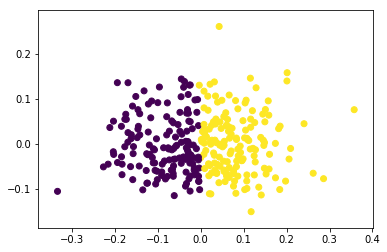

K = 5

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99

K-means Runtime (in seconds)
0.0179896


In [4]:

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)
start = time.time()
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)
end = time.time()
time_k = end - start
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the performance
print('K = 5')
print('\nComparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))
print('\nK-means Runtime (in seconds)')
print(round(time_k,7))

In [5]:
start = time.time()
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200,
    random_state=42)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)
end = time.time()
time_m = end - start
# Check the performance
print('K = 2')
print('\nComparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))
print('\nComparing Mini-batch to the data:')
print(pd.crosstab(predict_mini, y))
print('\nMini-Batch Runtime (in seconds)')
print(round(time_m,7))

K = 2

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      137    0
1       12  154

Comparing Mini-batch to the data:
col_0   0    1
row_0         
0      81   56
1      58  108

Mini-Batch Runtime (in seconds)
0.0079403


In [6]:
runtime['2'] = [time_k, time_m]

## K = 5

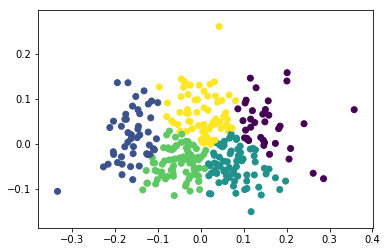

K = 5

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28

K-means Runtime (in seconds)
0.0309536


In [7]:

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)
start = time.time()
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)
end = time.time()
time_k = end - start
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the performance
print('K = 5')
print('\nComparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))
print('\nK-means Runtime (in seconds)')
print(round(time_k,7))

In [8]:
start = time.time()
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=200,
    random_state=42)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)
end = time.time()
time_m = end - start
# Check the performance
print('K = 2')
print('\nComparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))
print('\nComparing Mini-batch to the data:')
print(pd.crosstab(predict_mini, y))
print('\nMini-Batch Runtime (in seconds)')
print(round(time_m,7))

K = 2

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4
row_0                    
0       0   1   0   0  56
1       0  47   0   7   0
2       0   0   0  72   8
3      36   0   7   0   3
4       0   0  65   0   1

Comparing Mini-batch to the data:
col_0   0   1
row_0        
0      36  21
1      36  18
2      35  45
3      19  27
4      13  53

Mini-Batch Runtime (in seconds)
0.009979


In [9]:
runtime['5'] = [time_k, time_m]

## K = 100

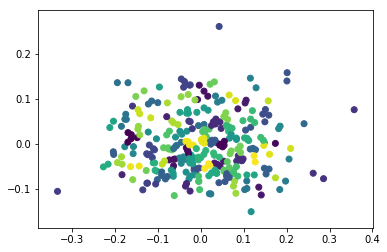

K = 2

Comparing k-means clusters against the data:
col_0  0  1
row_0      
0      3  2
1      1  4
2      0  1
3      2  2
4      2  2
5      0  4
6      1  1
7      3  0
8      1  3
9      0  1
10     1  0
11     1  2
12     4  3
13     2  3
14     0  2
15     0  1
16     1  0
17     2  1
18     0  1
19     0  4
20     4  1
21     4  3
22     1  0
23     2  2
24     1  3
25     2  0
26     1  1
27     1  4
28     2  3
29     2  0
...   .. ..
70     1  3
71     2  0
72     3  2
73     0  1
74     1  3
75     2  2
76     1  1
77     0  1
78     1  4
79     2  0
80     2  1
81     0  1
82     1  2
83     2  1
84     1  2
85     2  1
86     1  0
87     3  0
88     0  1
89     1  1
90     0  1
91     2  1
92     0  1
93     1  1
94     0  2
95     1  3
96     1  1
97     4  1
98     0  2
99     0  3

[100 rows x 2 columns]

K-means Runtime (in seconds)
0.2363338


In [10]:

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)
start = time.time()
# Calculate predicted values.
y_pred = KMeans(n_clusters=100, random_state=42).fit_predict(X_pca)
end = time.time()
time_k = end - start
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the performance
print('K = 2')
print('\nComparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))
print('\nK-means Runtime (in seconds)')
print(round(time_k,7))

In [11]:
start = time.time()
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=100,
    batch_size=200,
    random_state=42)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)
end = time.time()
time_m = end - start
# Check the performance
print('K = 2')
print('\nComparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))
print('\nComparing Mini-batch to the data:')
print(pd.crosstab(predict_mini, y))
print('\nMini-Batch Runtime (in seconds)')
print(round(time_m,7))

K = 2

Comparing k-means and mini batch k-means solutions:
col_0  0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  96  \
row_0                                         ...                               
0       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2       0   0   0   0   1   0   0   0   0   0 ...   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
5       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
6       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
7       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
8       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
9       0   1   0   0   0   0   0   0   0   0 ... 

In [12]:
runtime['100'] = [time_k, time_m]

In [16]:
runtime.index = ['K Means', 'MiniBatch']
display(runtime)

,2,5,100
K Means,0.01799,0.030954,0.236334
MiniBatch,0.00794,0.009979,0.054852
